In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,,0,,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,1.000000,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,,0,,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.800000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.400000,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.600000,0,,0,,1.000000,NO


<Axes: title={'center': 'diferencias'}, xlabel='clases'>

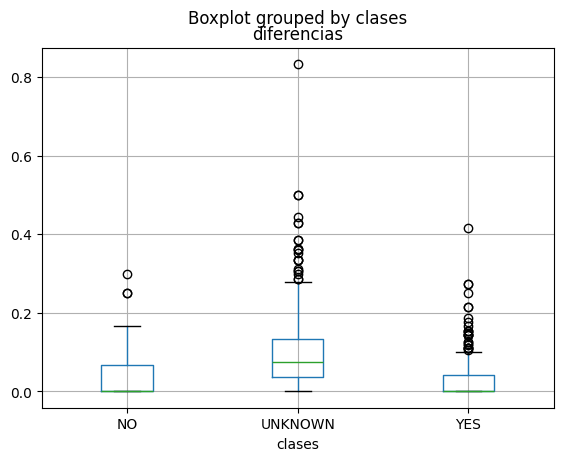

In [4]:
train.boxplot(by="clases",column="diferencias")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,,0,,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,1.000000,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,,0,,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.800000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.400000,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.600000,0,,0,,1.000000,NO


In [6]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'verbT',
       'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [7]:
train=train.drop(["verbT","verbH"],axis=1)

In [8]:
#train = train[['list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]

In [9]:
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,0,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,0,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,1.000000,0,0,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,0,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.800000,0,0,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.400000,0,0,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,0,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,0,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.600000,0,0,1.000000,NO


In [10]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [11]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [12]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.463790,0.166278,0.841878,0.768187,0.378215,0.863564,0.058507,0.311575,0.204771,0.074734,0.448226,0.201148,-0.191043,0.032953,0.053986,-0.197608
distancias,0.463790,1.000000,-0.054728,0.669953,0.661513,0.440013,0.530751,0.276287,0.885421,0.181300,0.378962,0.997710,-0.024987,-0.400287,-0.033385,-0.011639,-0.353676
entropia_total,0.166278,-0.054728,1.000000,0.131031,0.068330,0.038487,0.134315,0.020233,-0.043178,-0.019729,0.124274,-0.070915,-0.033983,0.071569,0.073999,0.004923,0.076146
entropias,0.841878,0.669953,0.131031,1.000000,0.957405,0.537860,0.893027,0.166513,0.590986,0.196954,0.122150,0.652494,-0.032416,-0.321462,-0.018137,0.065171,-0.293027
mutinf,0.768187,0.661513,0.068330,0.957405,1.000000,0.543589,0.834276,0.179586,0.573677,0.163090,0.113456,0.640951,-0.019715,-0.317921,-0.019929,0.051477,-0.297386
mearts,0.378215,0.440013,0.038487,0.537860,0.543589,1.000000,0.424628,0.113108,0.426190,0.114434,0.104859,0.446803,-0.043418,-0.229476,-0.030964,0.007730,-0.236429
max_info,0.863564,0.530751,0.134315,0.893027,0.834276,0.424628,1.000000,0.099940,0.450657,0.239724,0.065060,0.515429,0.002780,-0.267074,-0.005468,0.082182,-0.209716
list_comp,0.058507,0.276287,0.020233,0.166513,0.179586,0.113108,0.099940,1.000000,0.256173,0.024793,0.297037,0.274743,-0.099317,-0.119877,0.016221,0.002041,-0.358429
diferencias,0.311575,0.885421,-0.043178,0.590986,0.573677,0.426190,0.450657,0.256173,1.000000,0.185114,0.322844,0.888293,-0.274778,-0.406426,-0.058198,-0.012964,-0.316371
list_incomp,0.204771,0.181300,-0.019729,0.196954,0.163090,0.114434,0.239724,0.024793,0.185114,1.000000,0.065502,0.182574,-0.021058,-0.003955,-0.001632,0.076916,0.026277


<Axes: >

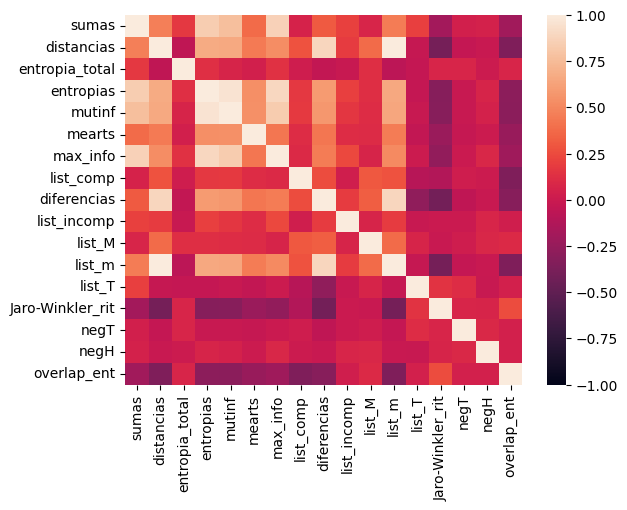

In [13]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [14]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.463790,0.166278,0.841878,0.768187,0.378215,0.863564,0.058507,0.311575,0.204771,0.074734,0.448226,0.201148,-0.191043,0.032953,0.053986,-0.197608
distancias,0.463790,1.000000,-0.054728,0.669953,0.661513,0.440013,0.530751,0.276287,0.885421,0.181300,0.378962,0.997710,-0.024987,-0.400287,-0.033385,-0.011639,-0.353676
entropia_total,0.166278,-0.054728,1.000000,0.131031,0.068330,0.038487,0.134315,0.020233,-0.043178,-0.019729,0.124274,-0.070915,-0.033983,0.071569,0.073999,0.004923,0.076146
entropias,0.841878,0.669953,0.131031,1.000000,0.957405,0.537860,0.893027,0.166513,0.590986,0.196954,0.122150,0.652494,-0.032416,-0.321462,-0.018137,0.065171,-0.293027
mutinf,0.768187,0.661513,0.068330,0.957405,1.000000,0.543589,0.834276,0.179586,0.573677,0.163090,0.113456,0.640951,-0.019715,-0.317921,-0.019929,0.051477,-0.297386
mearts,0.378215,0.440013,0.038487,0.537860,0.543589,1.000000,0.424628,0.113108,0.426190,0.114434,0.104859,0.446803,-0.043418,-0.229476,-0.030964,0.007730,-0.236429
max_info,0.863564,0.530751,0.134315,0.893027,0.834276,0.424628,1.000000,0.099940,0.450657,0.239724,0.065060,0.515429,0.002780,-0.267074,-0.005468,0.082182,-0.209716
list_comp,0.058507,0.276287,0.020233,0.166513,0.179586,0.113108,0.099940,1.000000,0.256173,0.024793,0.297037,0.274743,-0.099317,-0.119877,0.016221,0.002041,-0.358429
diferencias,0.311575,0.885421,-0.043178,0.590986,0.573677,0.426190,0.450657,0.256173,1.000000,0.185114,0.322844,0.888293,-0.274778,-0.406426,-0.058198,-0.012964,-0.316371
list_incomp,0.204771,0.181300,-0.019729,0.196954,0.163090,0.114434,0.239724,0.024793,0.185114,1.000000,0.065502,0.182574,-0.021058,-0.003955,-0.001632,0.076916,0.026277


In [15]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [16]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [17]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

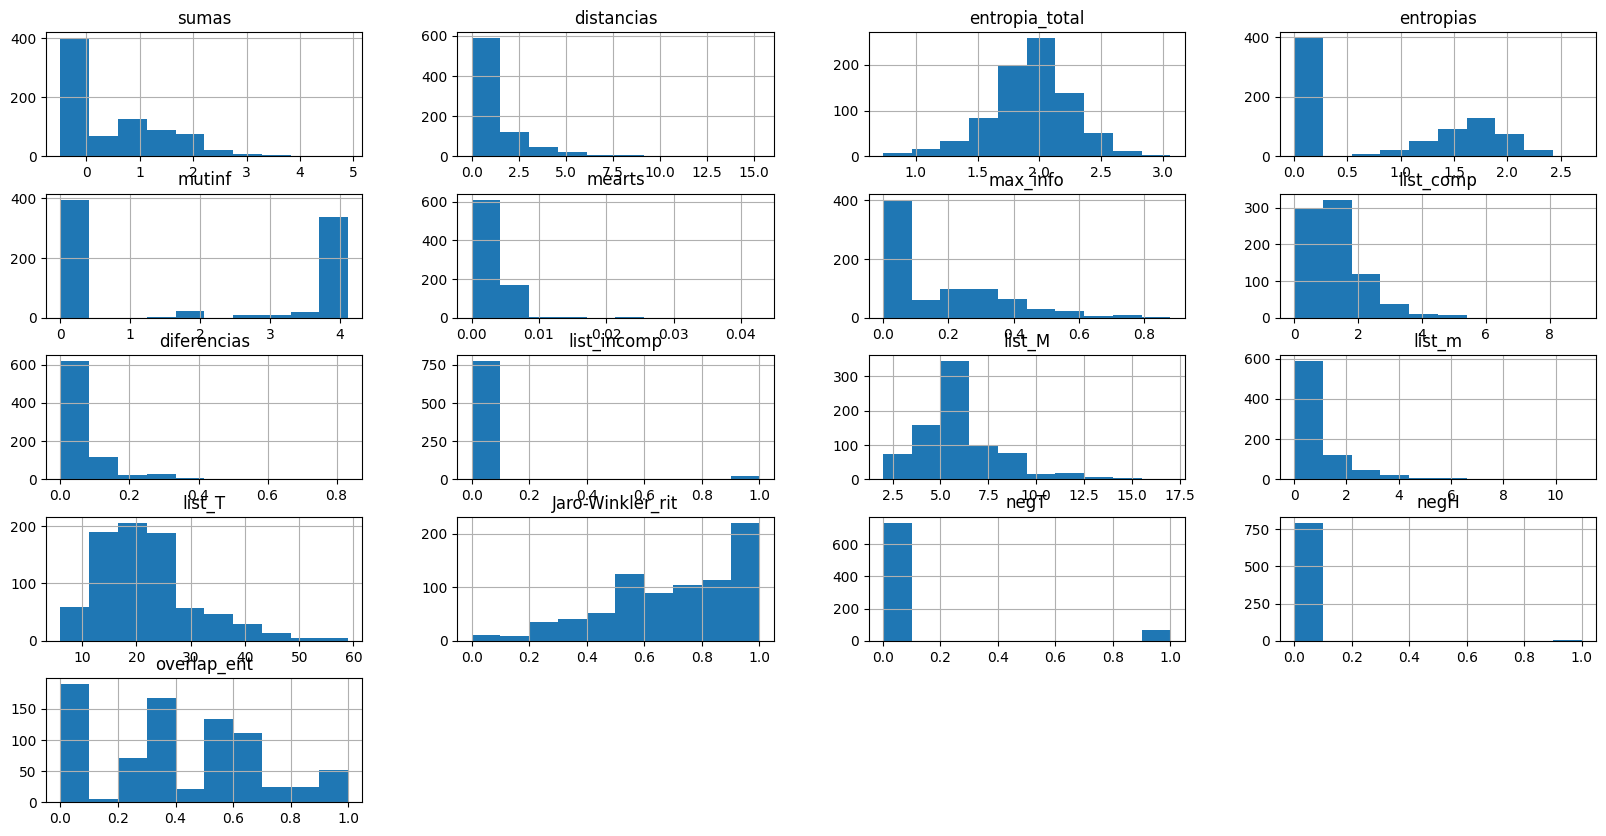

In [18]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [19]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4/GHS/GHS_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4/GHS/GHS_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [20]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,1.950,0.000,0.000000,0.000000,0.000000,2,0.000000,0,5,0,17,0.800000,0,,0,,0.666667,ENTAILMENT
1,0.438201,13.561706,1.648,1.636,3.128547,0.012747,0.182513,9,1.111111,0,21,10,9,0.285714,0,,0,,0.000000,NONENTAILMENT
2,0.659219,8.705629,1.719,1.596,3.957385,0.005196,0.221435,5,0.352941,0,13,6,17,0.615385,0,,0,,0.000000,NONENTAILMENT
3,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,2,0.000000,0,6,0,12,0.833333,0,,0,,0.000000,ENTAILMENT
4,0.488552,18.733646,1.788,1.702,3.860420,0.004449,0.222510,9,1.300000,0,23,13,10,0.217391,0,,0,,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.429414,17.644205,1.569,1.238,3.069444,0.003188,0.113475,4,0.684211,0,21,13,19,0.285714,0,,0,,0.166667,NONENTAILMENT
796,0.686623,2.922877,1.808,1.565,3.935828,0.004631,0.204012,1,0.074074,0,7,2,27,0.571429,0,,0,,0.250000,ENTAILMENT
797,0.336100,12.222525,1.709,1.398,2.983615,0.012891,0.164703,8,0.562500,0,18,9,16,0.388889,0,,0,,0.000000,NONENTAILMENT
798,0.793860,15.813822,1.979,1.801,3.492221,0.007408,0.338049,6,0.611111,0,20,11,18,0.350000,0,,1,do,0.090909,NONENTAILMENT


In [21]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)


In [22]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,1.950,0.000,0.000000,0.000000,0.000000,2,0.000000,0,5,0,17,0.800000,0,0,0.666667,ENTAILMENT
1,0.438201,13.561706,1.648,1.636,3.128547,0.012747,0.182513,9,1.111111,0,21,10,9,0.285714,0,0,0.000000,NONENTAILMENT
2,0.659219,8.705629,1.719,1.596,3.957385,0.005196,0.221435,5,0.352941,0,13,6,17,0.615385,0,0,0.000000,NONENTAILMENT
3,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,2,0.000000,0,6,0,12,0.833333,0,0,0.000000,ENTAILMENT
4,0.488552,18.733646,1.788,1.702,3.860420,0.004449,0.222510,9,1.300000,0,23,13,10,0.217391,0,0,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.429414,17.644205,1.569,1.238,3.069444,0.003188,0.113475,4,0.684211,0,21,13,19,0.285714,0,0,0.166667,NONENTAILMENT
796,0.686623,2.922877,1.808,1.565,3.935828,0.004631,0.204012,1,0.074074,0,7,2,27,0.571429,0,0,0.250000,ENTAILMENT
797,0.336100,12.222525,1.709,1.398,2.983615,0.012891,0.164703,8,0.562500,0,18,9,16,0.388889,0,0,0.000000,NONENTAILMENT
798,0.793860,15.813822,1.979,1.801,3.492221,0.007408,0.338049,6,0.611111,0,20,11,18,0.350000,0,1,0.090909,NONENTAILMENT


In [23]:
#test = test[['list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]

In [24]:
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,1.950,0.000,0.000000,0.000000,0.000000,2,0.000000,0,5,0,17,0.800000,0,0,0.666667,ENTAILMENT
1,0.438201,13.561706,1.648,1.636,3.128547,0.012747,0.182513,9,1.111111,0,21,10,9,0.285714,0,0,0.000000,NONENTAILMENT
2,0.659219,8.705629,1.719,1.596,3.957385,0.005196,0.221435,5,0.352941,0,13,6,17,0.615385,0,0,0.000000,NONENTAILMENT
3,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,2,0.000000,0,6,0,12,0.833333,0,0,0.000000,ENTAILMENT
4,0.488552,18.733646,1.788,1.702,3.860420,0.004449,0.222510,9,1.300000,0,23,13,10,0.217391,0,0,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.429414,17.644205,1.569,1.238,3.069444,0.003188,0.113475,4,0.684211,0,21,13,19,0.285714,0,0,0.166667,NONENTAILMENT
796,0.686623,2.922877,1.808,1.565,3.935828,0.004631,0.204012,1,0.074074,0,7,2,27,0.571429,0,0,0.250000,ENTAILMENT
797,0.336100,12.222525,1.709,1.398,2.983615,0.012891,0.164703,8,0.562500,0,18,9,16,0.388889,0,0,0.000000,NONENTAILMENT
798,0.793860,15.813822,1.979,1.801,3.492221,0.007408,0.338049,6,0.611111,0,20,11,18,0.350000,0,1,0.090909,NONENTAILMENT


In [25]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [26]:
# RTE3
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [27]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [28]:
# X_train = np.where(np.isnan(X_train), 0, X_train)
# X_train

In [29]:
X_train.shape

(800, 17)

In [30]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [31]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [32]:
model.decision_function(X_train)

array([ 3.50240343e-01,  9.69247444e-01,  1.13244726e-01,  1.15899539e+00,
        1.37418195e-01,  1.00576092e+00,  6.95371011e-01, -1.15300616e+00,
        6.53774330e-01, -1.09496843e+00,  9.90135267e-01,  3.98513475e-01,
        1.23832829e+00,  5.09634379e-01,  4.01597376e-01,  6.10785800e-01,
        3.84341778e-01,  1.59624126e-01, -3.07149897e-01, -2.08250005e-01,
        1.20207331e+00,  5.68072687e-01,  9.91814314e-01,  1.14134015e+00,
        8.62023705e-01,  4.58227029e-01,  6.91614753e-01, -1.01932181e+00,
        3.37960144e-01,  6.31395926e-01,  9.82561683e-01,  4.91773599e-01,
        6.57431719e-01,  1.03920031e+00,  2.92409755e-02,  2.06298095e-01,
        1.14596942e+00,  1.21273413e+00, -4.19213126e-01,  1.16546501e+00,
        5.01692710e-01, -3.78282401e-01,  3.28133550e-01,  1.00846874e-01,
       -2.54814394e-01,  4.81133305e-01,  5.47836358e-02,  9.09952333e-01,
        8.46246401e-01,  8.32412654e-01, -1.38916678e+00,  4.50157615e-01,
       -1.13298611e+00,  

In [33]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [34]:
model.classes_

array([0, 1])

In [35]:
model.coef_[0]

array([ 0.65493818, -1.98476945,  0.21703179, -0.45246639, -0.37152595,
       -1.28914805,  0.60747688, -1.03897529, -1.07357399,  0.07282176,
        0.61428213, -2.31158257,  0.43644214,  1.139564  , -0.20119866,
       -0.49927164,  0.88296355])

In [36]:
coeficientes=model.coef_[0]

In [37]:
coeficientes

array([ 0.65493818, -1.98476945,  0.21703179, -0.45246639, -0.37152595,
       -1.28914805,  0.60747688, -1.03897529, -1.07357399,  0.07282176,
        0.61428213, -2.31158257,  0.43644214,  1.139564  , -0.20119866,
       -0.49927164,  0.88296355])

In [38]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  13 Jaro-Winkler_rit 11 list_m


In [39]:
n_columns=train.shape[1]-1

In [40]:
n_columns

17

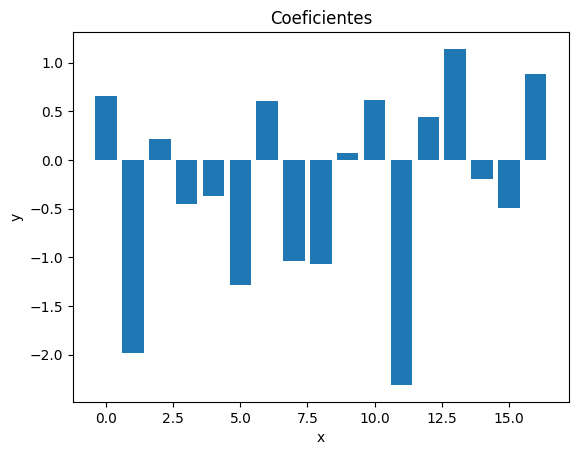

In [41]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [42]:
# X_test = np.where(np.isnan(X_test), 0, X_test)
# X_test

In [43]:
X_test.shape

(800, 17)

In [44]:
predictions = model.predict(X_test)

In [45]:
predictions

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,

In [46]:
test["predicciones"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
0,0.000000,0.000000,1.950,0.000,0.000000,0.000000,0.000000,2,0.000000,0,5,0,17,0.800000,0,0,0.666667,ENTAILMENT,1
1,0.438201,13.561706,1.648,1.636,3.128547,0.012747,0.182513,9,1.111111,0,21,10,9,0.285714,0,0,0.000000,NONENTAILMENT,0
2,0.659219,8.705629,1.719,1.596,3.957385,0.005196,0.221435,5,0.352941,0,13,6,17,0.615385,0,0,0.000000,NONENTAILMENT,0
3,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,2,0.000000,0,6,0,12,0.833333,0,0,0.000000,ENTAILMENT,1
4,0.488552,18.733646,1.788,1.702,3.860420,0.004449,0.222510,9,1.300000,0,23,13,10,0.217391,0,0,0.000000,NONENTAILMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.429414,17.644205,1.569,1.238,3.069444,0.003188,0.113475,4,0.684211,0,21,13,19,0.285714,0,0,0.166667,NONENTAILMENT,0
796,0.686623,2.922877,1.808,1.565,3.935828,0.004631,0.204012,1,0.074074,0,7,2,27,0.571429,0,0,0.250000,ENTAILMENT,0
797,0.336100,12.222525,1.709,1.398,2.983615,0.012891,0.164703,8,0.562500,0,18,9,16,0.388889,0,0,0.000000,NONENTAILMENT,0
798,0.793860,15.813822,1.979,1.801,3.492221,0.007408,0.338049,6,0.611111,0,20,11,18,0.350000,0,1,0.090909,NONENTAILMENT,0


In [47]:
incorrectos = test[(test["clases"]=="ENTAILMENT") & (test["predicciones"]==0)]
incorrectos

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
12,1.327224,1.460727,1.834,1.640,3.958804,0.004918,0.335447,1,0.066667,0,5,1,15,0.600000,0,0,0.000000,ENTAILMENT,0
15,0.358577,1.431856,2.010,0.918,3.996243,0.003759,0.104793,1,0.111111,0,4,1,9,0.750000,0,0,0.000000,ENTAILMENT,0
23,0.645183,4.413850,1.890,1.552,3.860511,0.004020,0.202520,1,0.142857,0,8,3,21,0.750000,0,0,0.333333,ENTAILMENT,0
28,1.348087,1.456938,1.880,1.875,4.024980,0.003683,0.302883,2,0.055556,0,5,1,18,0.800000,0,0,0.000000,ENTAILMENT,0
34,0.653284,1.457241,2.150,1.522,3.941475,0.003359,0.154878,3,0.071429,0,6,1,14,1.000000,0,0,0.000000,ENTAILMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0.721444,2.921776,2.073,1.793,3.957850,0.004884,0.369910,0,0.133333,0,3,2,15,0.666667,0,0,0.000000,ENTAILMENT,0
790,0.833846,4.327538,1.769,1.844,3.839726,0.004512,0.265665,0,0.200000,0,5,3,15,0.600000,0,0,0.250000,ENTAILMENT,0
793,1.089970,1.453447,1.416,1.434,3.871097,0.003504,0.188124,1,0.040000,0,4,1,25,0.750000,0,0,0.000000,ENTAILMENT,0
794,1.450432,1.445181,1.955,1.473,3.958880,0.005256,0.220832,2,0.045455,0,5,1,22,0.400000,0,0,0.000000,ENTAILMENT,0


In [48]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[251 148]
 [  5 396]]


In [49]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.81
precision:  0.98
recall 0.63
f1_score:  0.77
matthews_score:  0.66


In [50]:
X_train.shape

(800, 17)

In [51]:
X_test.shape

(800, 17)

In [52]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [53]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [54]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.840000 (0.158827)
Logistic Regression Precision:: 0.820000 (0.158455)
Logistic Regression Recall:: 0.900000 (0.145820)
Logistic Regression F1-score:: 0.850000 (0.148611)


In [55]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.660000 (0.334156)


In [56]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [57]:
#linear_model

In [58]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [59]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       401
           1       0.98      0.63      0.77       399

    accuracy                           0.81       800
   macro avg       0.85      0.81      0.80       800
weighted avg       0.85      0.81      0.80       800



In [60]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [61]:
test.columns[:-1]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent', 'clases'],
      dtype='object')

In [62]:
explainer.expected_value

-0.1637737151522033

In [63]:
X_test

array([[0.        , 0.        , 0.75905021, ..., 0.        , 0.        ,
        0.66666667],
       [0.15416749, 0.3819263 , 0.64149475, ..., 0.        , 0.        ,
        0.        ],
       [0.23192589, 0.24516893, 0.66913196, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11824626, 0.34421214, 0.66523939, ..., 0.        , 0.        ,
        0.        ],
       [0.27929494, 0.44535066, 0.77033865, ..., 0.        , 1.        ,
        0.09090909],
       [0.36545847, 0.19952717, 0.82833787, ..., 0.        , 0.        ,
        0.16666667]])

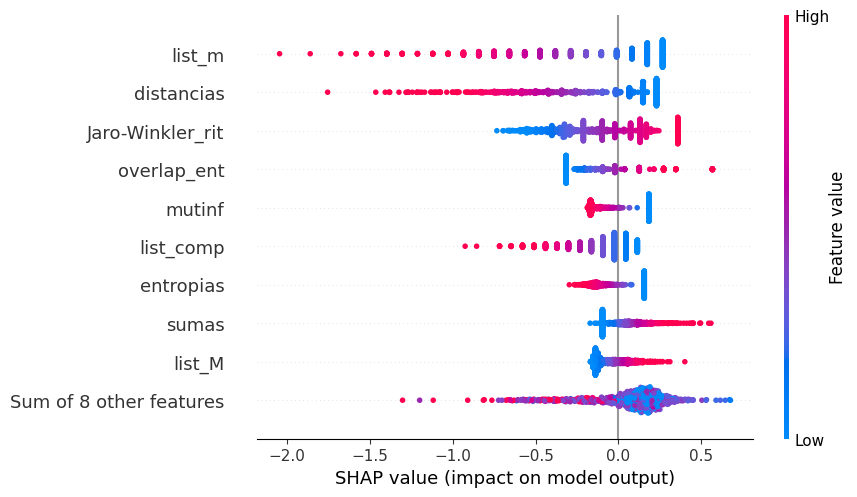

In [64]:
shap.plots.beeswarm(shap_values)

In [65]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.41555071 0.32537489 0.71195018 0.7254589  0.92897317 0.12270235
 0.36556586 0.4        0.07894737 0.         0.3902439  0.32
 0.44444444 0.5        1.         0.         0.07692308] 0 0


IndexError: index 17 is out of bounds for axis 0 with size 17

In [66]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.19358178 0.04059002 0.61307902 0.44772546 0.9577156  0.1034393
 0.25356351 0.33333333 0.00986842 0.         0.17073171 0.04
 0.44444444 0.85714286 0.         1.         0.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

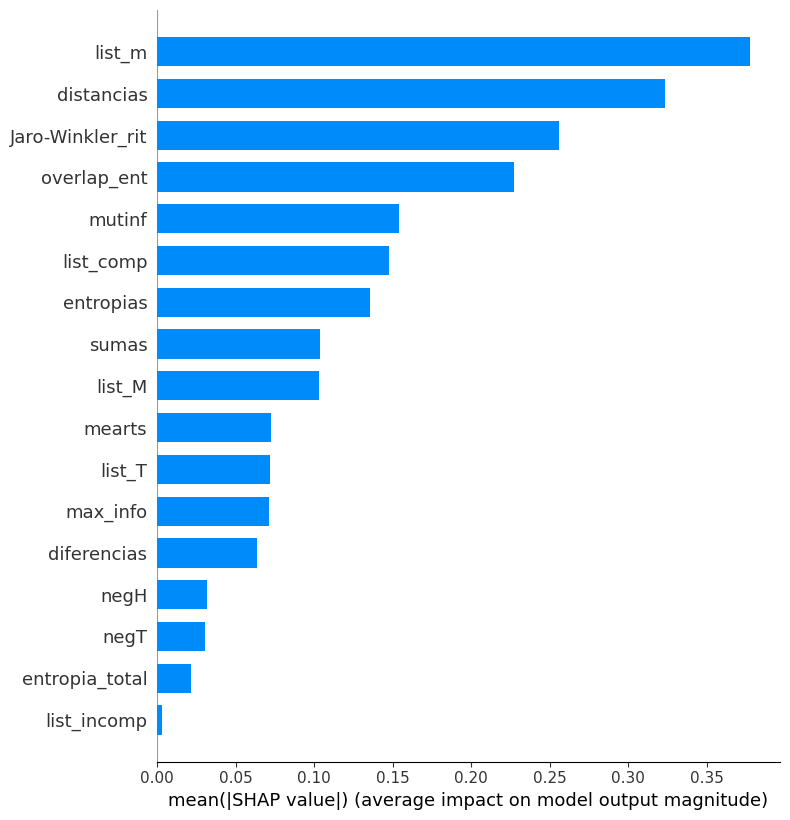

In [67]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

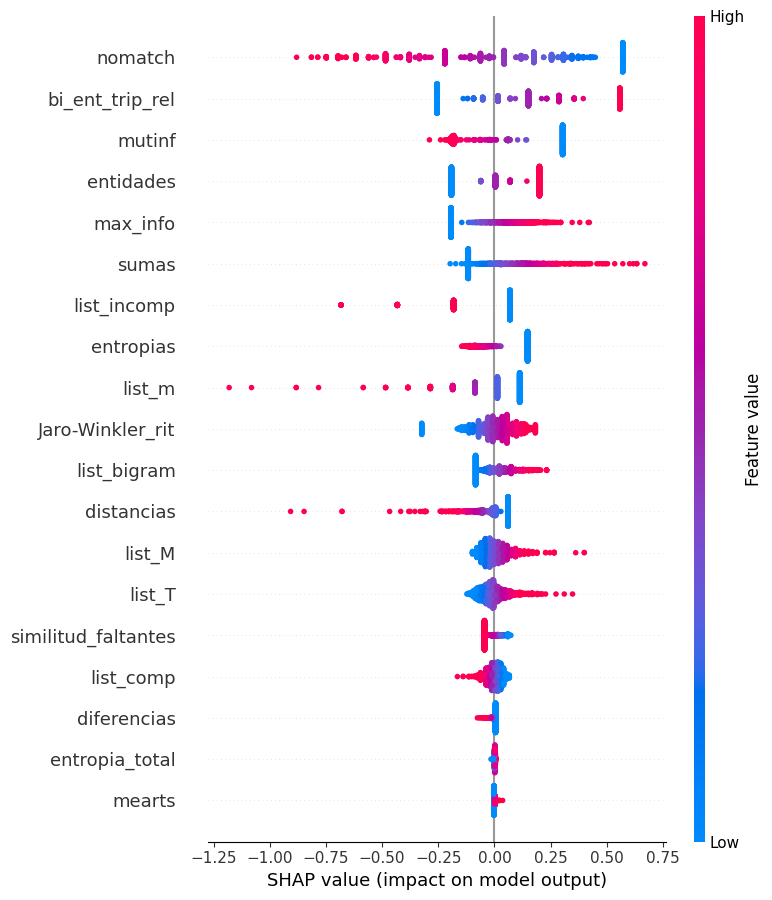

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

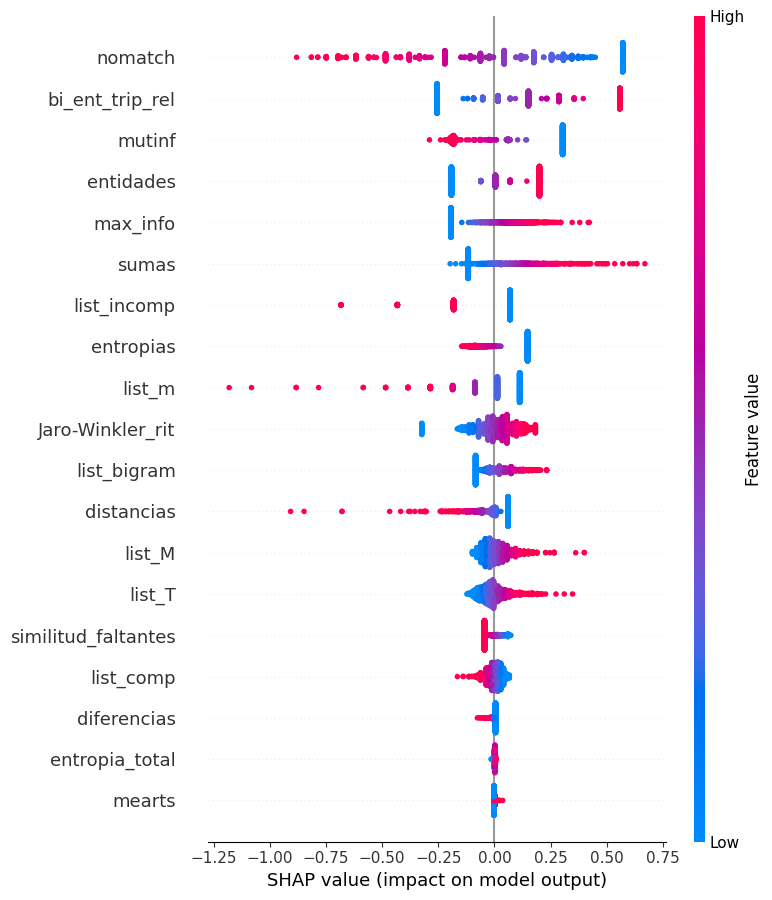

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

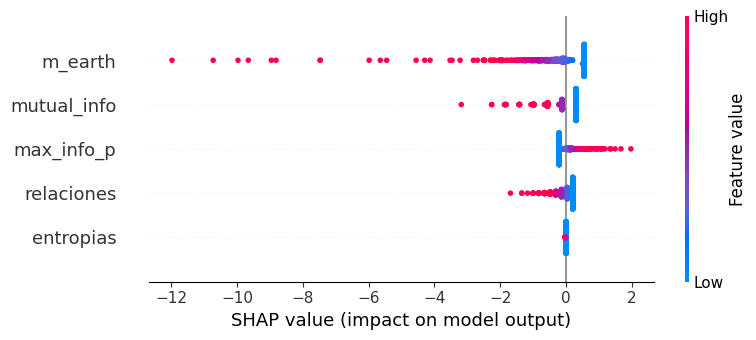

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


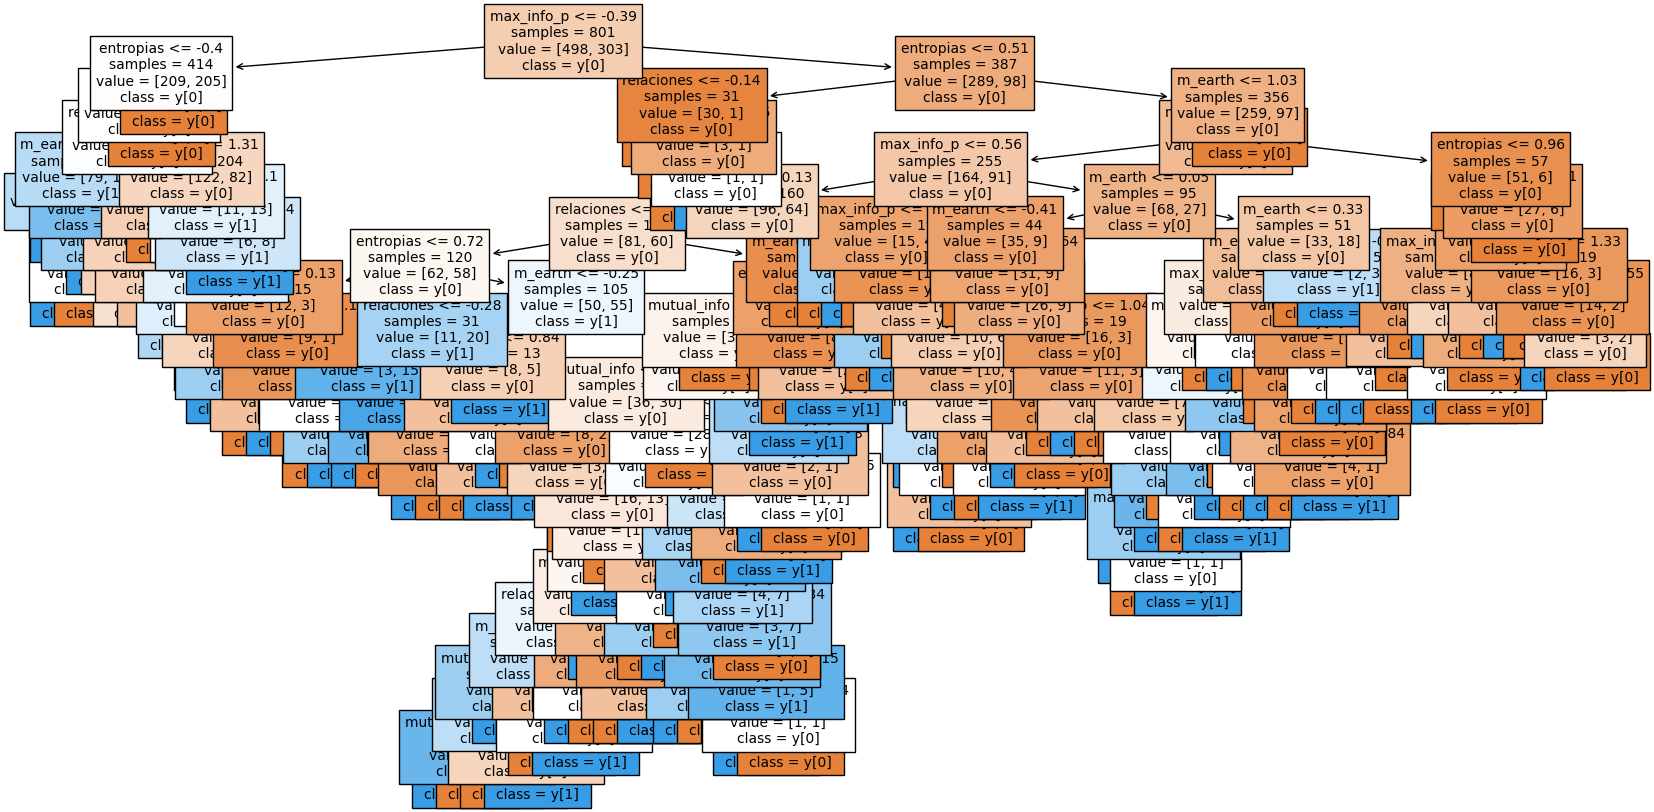

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )